In [1]:
#Question 2

In [2]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
start = dt.datetime(1954,12,1)
end = dt.datetime(2019,10,1)
var_list = ['TB3MS', 'CPIAUCSL', 'GDPC1']
data = pdr.DataReader(var_list, 'fred', start, end)

In [3]:
data.head()

,TB3MS,CPIAUCSL,GDPC1
DATE,,,
1954-12-01,1.15,26.77,NaN
1955-01-01,1.22,26.77,2815.134
1955-02-01,1.17,26.82,NaN
1955-03-01,1.28,26.79,NaN
1955-04-01,1.59,26.79,2860.942


In [4]:
import numpy as np 
data['Date']=data.index
data['Quarter'] = pd.to_datetime(data['Date']).dt.to_period('Q')
quarterly_data=data.groupby(['Quarter'], as_index=False).mean().dropna()
quarterly_data.index=quarterly_data['Quarter']
quarterly_data = quarterly_data.drop(['Quarter'], axis=1)

In [5]:
quarterly_data.head()

,TB3MS,CPIAUCSL,GDPC1
Quarter,,,
1955Q1,1.223333,26.793333,2815.134
1955Q2,1.483333,26.756667,2860.942
1955Q3,1.856667,26.776667,2899.578
1955Q4,2.336667,26.856667,2916.985
1956Q1,2.326667,26.860000,2905.656


In [6]:
#lags
quarterly_data['lag_rate']=quarterly_data['TB3MS'].shift(periods=1)
quarterly_data['delta_rate']=quarterly_data['TB3MS']-quarterly_data['TB3MS'].shift(periods=1)
quarterly_data['delta_y']=np.log(quarterly_data['GDPC1'])-np.log(quarterly_data['GDPC1']).shift(periods=1)
quarterly_data['lag_delta_y']=quarterly_data['delta_y'].shift(periods=1)
quarterly_data['inflation']=np.log(quarterly_data['CPIAUCSL'])-np.log(quarterly_data['CPIAUCSL']).shift(periods=1)

In [7]:
quarterly_data.head()

,TB3MS,CPIAUCSL,GDPC1,lag_rate,delta_rate,delta_y,lag_delta_y,inflation
Quarter,,,,,,,,
1955Q1,1.223333,26.793333,2815.134,NaN,NaN,NaN,NaN,NaN
1955Q2,1.483333,26.756667,2860.942,1.223333,0.260000,0.016141,NaN,-0.001369
1955Q3,1.856667,26.776667,2899.578,1.483333,0.373333,0.013414,0.016141,0.000747
1955Q4,2.336667,26.856667,2916.985,1.856667,0.480000,0.005985,0.013414,0.002983
1956Q1,2.326667,26.860000,2905.656,2.336667,-0.010000,-0.003891,0.005985,0.000124


In [8]:
#（1）Plot a graph of the OLS residuals against time
import statsmodels.formula.api as smf
model = smf.ols("delta_rate ~ delta_y + lag_delta_y+inflation+lag_rate", quarterly_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             delta_rate   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     18.63
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.95e-13
Time:                        23:47:05   Log-Likelihood:                -239.66
No. Observations:                 258   AIC:                             489.3
Df Residuals:                     253   BIC:                             507.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2630      0.082     -3.193      

<AxesSubplot:xlabel='Quarter'>

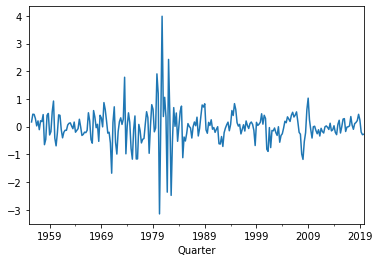

In [9]:
quarterly_data["residuals"] = model.resid
quarterly_data["fitted"] = model.fittedvalues
quarterly_data["residuals"].plot()

In [10]:
#(2)Regress the residuals on the fitted values and on a constant

In [11]:
model_fitted1 = smf.ols("residuals~ fitted", quarterly_data).fit()
print(model_fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:              residuals   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               1.00
Time:                        23:47:05   Log-Likelihood:                -239.66
No. Observations:                 258   AIC:                             483.3
Df Residuals:                     256   BIC:                             490.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.44e-14      0.038  -8.99e-13      1.0

In [12]:
#Regressthe fitted values on residuals and a constant 
model_fitted2 = smf.ols("fitted~ residuals ", quarterly_data).fit()
print(model_fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                 fitted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               1.00
Time:                        23:47:06   Log-Likelihood:                -81.999
No. Observations:                 258   AIC:                             168.0
Df Residuals:                     256   BIC:                             175.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.021      0.031      0.9

Answer: The residuals regressed on the fitted values and a constant have the same coefficient equals 0. Because the residuals lie in $S^{\perp } $(x), and fitted values and constant lie in  S(x).

<AxesSubplot:xlabel='Quarter'>

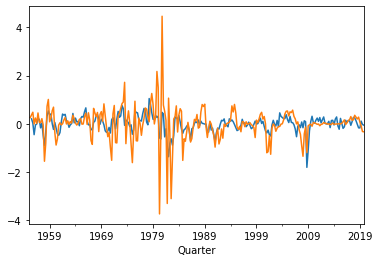

In [13]:
quarterly_data["fitted"].plot()
quarterly_data["delta_rate"].plot()

In [14]:
#(3)regress delta 
model_fitted3 = smf.ols("delta_rate~ delta_y+lag_delta_y+lag_rate", quarterly_data).fit()
print(model_fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:             delta_rate   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     14.62
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           8.22e-09
Time:                        23:47:06   Log-Likelihood:                -252.42
No. Observations:                 258   AIC:                             512.8
Df Residuals:                     254   BIC:                             527.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1737      0.084     -2.057      

In [15]:
#save the residual from the regression as et
quarterly_data['et']=model_fitted3.resid

The fitted values regressed on the residuals and constant also have the coefficient of the residuals equals 0.

In [16]:
#(3)regress inlfation
model_fitted4 = smf.ols("inflation~ delta_y+lag_delta_y+lag_rate", quarterly_data).fit()
print(model_fitted4.summary())

                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     57.70
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.77e-28
Time:                        23:47:06   Log-Likelihood:                 967.50
No. Observations:                 258   AIC:                            -1927.
Df Residuals:                     254   BIC:                            -1913.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0026      0.001      3.449      

In [17]:
#save the residual from the regression as et
quarterly_data['vt']=model_fitted4.resid

In [18]:
quarterly_data.head()


,TB3MS,CPIAUCSL,GDPC1,lag_rate,delta_rate,delta_y,lag_delta_y,inflation,residuals,fitted,et,vt
Quarter,,,,,,,,,,,,
1955Q1,1.223333,26.793333,2815.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955Q2,1.483333,26.756667,2860.942,1.223333,0.260000,0.016141,NaN,-0.001369,NaN,NaN,NaN,NaN
1955Q3,1.856667,26.776667,2899.578,1.483333,0.373333,0.013414,0.016141,0.000747,0.168037,0.205296,0.058743,-0.003148
1955Q4,2.336667,26.856667,2916.985,1.856667,0.480000,0.005985,0.013414,0.002983,0.448603,0.031397,0.384323,-0.001852
1956Q1,2.326667,26.860000,2905.656,2.336667,-0.010000,-0.003891,0.005985,0.000124,0.441075,-0.451075,0.232089,-0.006020


In [19]:
#regress et on vt
model_fitted5 = smf.ols("et~ vt", quarterly_data).fit()
print(model_fitted5.summary())
print(model_fitted5.resid)

                            OLS Regression Results                            
Dep. Variable:                     et   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     26.62
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           4.97e-07
Time:                        23:47:06   Log-Likelihood:                -239.66
No. Observations:                 258   AIC:                             483.3
Df Residuals:                     256   BIC:                             490.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.594e-14      0.038   4.16e-13      1.0

The estimated coefficients and the residuals from the last regression are the same as the ones in estimated regression (1). This proves that the FWL Theorem stands.

In [20]:
#(4) calculating diagonal elements of Px and levearge

In [21]:
quarterly_data=quarterly_data.dropna()
x_mat=quarterly_data[['delta_y' , 'lag_delta_y', 'inflation', 'lag_rate']].to_numpy()

import numpy.linalg as nplin #import linear algebra from numpy
from numpy.linalg import multi_dot
h_hat=multi_dot([x_mat,nplin.inv(np.dot(x_mat.T,x_mat)), x_mat.T]).diagonal()
quarterly_data.insert(0, 'h_hat', h_hat) 
alpha=quarterly_data['residuals'].to_numpy()/(1-quarterly_data['h_hat'].to_numpy())
quarterly_data.insert(0, 'alpha', alpha) 

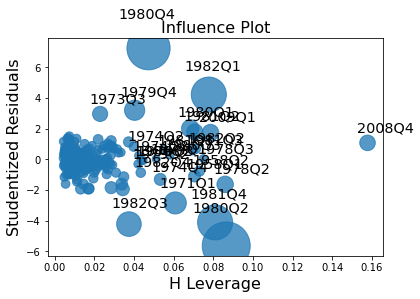

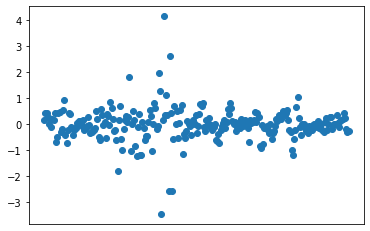

In [22]:
import matplotlib.pyplot as plot
import statsmodels.api as sm
sm.graphics.influence_plot(model)
plot.show()

time=quarterly_data.index.astype(str) #too messy to print periods as strings so switch off the x-axis
plot.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot.scatter(time, alpha) #influence scatter plot

Observations in 1980-1982 and 2008Q4 have unusually high leverage.

In [23]:
#Question 3

In [24]:
data_earnings = pd.read_csv('earnings-data.csv')
data_earnings.info()
data_earnings.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46302 entries, 0 to 46301
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    46302 non-null  float64
 1   age     46302 non-null  int64  
 2   ed1     46302 non-null  int64  
 3   ed2     46302 non-null  int64  
 4   ed3     46302 non-null  int64  
 5   ed4     46302 non-null  int64  
 6   ed5     46302 non-null  int64  
 7   year    46302 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.8 MB


,earn,age,ed1,ed2,ed3,ed4,ed5,year
35645,1000.00,39,0,0,1,0,0,2010
17179,200.00,45,1,0,0,0,0,2001
26561,1057.00,63,0,0,0,1,0,2006
17414,712.00,45,0,0,0,1,0,2001
24050,692.30,59,0,1,0,0,0,2004
26721,692.30,40,0,0,1,0,0,2006
14451,962.00,36,0,1,0,0,0,1999
20871,961.53,50,0,0,1,0,0,2003
44533,126.92,35,0,1,0,0,0,2015
3888,1153.00,36,0,0,1,0,0,1994


In [25]:
from statsmodels.formula.api import ols

In [26]:
log_earn=np.log(data_earnings['earn'])
data_earnings.insert(0,'log_earn',log_earn)
sq_age=np.square(data_earnings['age'])
data_earnings.insert(0,'squared_age',sq_age)

In [27]:
dummy_yr=pd.get_dummies(data_earnings, prefix='', prefix_sep='', columns=['year'])
dummy_yr.head()

,squared_age,log_earn,earn,age,ed1,ed2,ed3,ed4,ed5,1992,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,841,6.047372,423.0,29,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1521,5.971262,392.0,39,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,900,6.030685,416.0,30,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2401,4.787492,120.0,49,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2209,6.396930,600.0,47,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
earn_dumyr = pd.concat([data_earnings,dummy_yr],axis = 1)
earn_dumyr.head()

,squared_age,log_earn,earn,age,ed1,ed2,ed3,ed4,ed5,year,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,841,6.047372,423.0,29,0,0,0,1,0,1992,...,0,0,0,0,0,0,0,0,0,0
1,1521,5.971262,392.0,39,0,0,1,0,0,1992,...,0,0,0,0,0,0,0,0,0,0
2,900,6.030685,416.0,30,0,0,1,0,0,1992,...,0,0,0,0,0,0,0,0,0,0
3,2401,4.787492,120.0,49,0,0,0,1,0,1992,...,0,0,0,0,0,0,0,0,0,0
4,2209,6.396930,600.0,47,0,0,1,0,0,1992,...,0,0,0,0,0,0,0,0,0,0


In [29]:
reg_year = earn_dumyr.drop(['log_earn','year'],axis=1)

model = smf.ols("log_earn~reg_year+ed1+ed2+ed3+ed4+ed5+age+squared_age", data_earnings).fit()

In [30]:
print(model.summary())

data_earnings.insert(0,'log_earn_resid',model.resid)

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     5879.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:47:07   Log-Likelihood:                -17792.
No. Observations:               46302   AIC:                         3.565e+04
Df Residuals:                   46271   BIC:                         3.592e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2032      0.016    194.168   

In [31]:
model1 = smf.ols("log_earn~age", data_earnings).fit()
print(model1.summary())

data_earnings.insert(0,'age_resid',model1.resid)

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     524.5
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          2.00e-115
Time:                        23:47:07   Log-Likelihood:                -53902.
No. Observations:               46302   AIC:                         1.078e+05
Df Residuals:                   46300   BIC:                         1.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9370      0.015    400.726      0.0

In [32]:
model2 = smf.ols("log_earn~sq_age", data_earnings).fit()
print(model2.summary())
data_earnings.insert(0,'sq_age_resid',model2.resid)

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     460.0
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.53e-101
Time:                        23:47:07   Log-Likelihood:                -53934.
No. Observations:               46302   AIC:                         1.079e+05
Df Residuals:                   46300   BIC:                         1.079e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1077      0.008    743.123      0.0

In [33]:
model3 = smf.ols("log_earn~ed1", data_earnings).fit()
print(model3.summary())
data_earnings.insert(0,'ed1_resid',model3.resid)

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     5536.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:47:07   Log-Likelihood:                -51548.
No. Observations:               46302   AIC:                         1.031e+05
Df Residuals:                   46300   BIC:                         1.031e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3655      0.004   1732.028      0.0

In [34]:
model4 = smf.ols("log_earn~ed2", data_earnings).fit()
print(model4.summary())
data_earnings.insert(0,'ed2_resid',model4.resid)

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1045.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          8.63e-227
Time:                        23:47:07   Log-Likelihood:                -53646.
No. Observations:               46302   AIC:                         1.073e+05
Df Residuals:                   46300   BIC:                         1.073e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3294      0.004   1550.345      0.0

In [35]:
model5 = smf.ols("log_earn~ed3", data_earnings).fit()
print(model5.summary())
data_earnings.insert(0,'ed3_resid',model5.resid)

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     20.10
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           7.38e-06
Time:                        23:47:07   Log-Likelihood:                -54153.
No. Observations:               46302   AIC:                         1.083e+05
Df Residuals:                   46300   BIC:                         1.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2770      0.004   1437.865      0.0

In [36]:
model6 = smf.ols("log_earn~ed4", data_earnings).fit()
print(model6.summary())
data_earnings.insert(0,'ed4_resid',model6.resid)

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2668.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:47:07   Log-Likelihood:                -52866.
No. Observations:               46302   AIC:                         1.057e+05
Df Residuals:                   46300   BIC:                         1.058e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1699      0.004   1548.577      0.0

In [37]:
model7 = smf.ols("log_earn~ed5", data_earnings).fit()
print(model7.summary())
data_earnings.insert(0,'ed5_resid',model6.resid)

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3913.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:47:07   Log-Likelihood:                -52285.
No. Observations:               46302   AIC:                         1.046e+05
Df Residuals:                   46300   BIC:                         1.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1906      0.004   1681.364      0.0

In [38]:
data_earnings.head()

,ed5_resid,ed4_resid,ed3_resid,ed2_resid,ed1_resid,sq_age_resid,age_resid,log_earn_resid,squared_age,log_earn,earn,age,ed1,ed2,ed3,ed4,ed5,year
0,-0.562871,-0.562871,-0.229625,-0.282013,-0.318146,-0.131717,-0.117425,0.109791,841,6.047372,423.0,29,0,0,0,1,0,1992
1,-0.198629,-0.198629,-0.270685,-0.358124,-0.394257,-0.265585,-0.272100,0.059816,1521,5.971262,392.0,39,0,0,1,0,0,1992
2,-0.139206,-0.139206,-0.211262,-0.298700,-0.334833,-0.153415,-0.141969,0.094831,900,6.030685,416.0,30,0,0,1,0,0,1992
3,-1.822752,-1.822752,-1.489505,-1.541894,-1.578027,-1.524100,-1.534434,-0.766642,2401,4.787492,120.0,49,0,0,0,1,0,1992
4,0.227039,0.227039,0.154983,0.067544,0.031411,0.101646,0.090717,0.231751,2209,6.396930,600.0,47,0,0,1,0,0,1992


In [42]:
model8 = smf.ols("log_earn~reg_year+ed5_resid+ed4_resid+ed3_resid+ed2_resid+ed1_resid+age_resid+sq_age_resid+log_earn_resid", data_earnings).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.977e+25
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:48:55   Log-Likelihood:             1.1543e+06
No. Observations:               46302   AIC:                        -2.309e+06
Df Residuals:                   46270   BIC:                        -2.308e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6707   1.22e-13   2.19e

In [10]:

import numpy as np
x=[1,2,3,4,5]
a=np.std(x)
print (a)

y=[10,20,30,40,50]
b=np.std(y)
print (b)

1.4142135623730951
14.142135623730951


The estimates are the same as in the first question.